## TODO:
    1- Review tweets: why the are not complete?
    2- Should I standarize by number of senators?
    3- Should I remove emojis?
    4- Check strange charecters in tweets
    

In [1]:
#import time
#for i in range(0,100000):
#  time.sleep(100)
#  print(i)

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
import re

#### Read file

In [3]:
df_eeuu_member_of_congress = pd.read_csv('https://raw.githubusercontent.com/alexferrero23/twitter-category-nlp/develop/data/eeuu_member_of_congress.csv', sep=';')

In [4]:
list_senators = df_eeuu_member_of_congress['Twitter'].dropna().tolist()
list_senators = [x.replace('@', '') for x in list_senators]
list_senators = [x.replace(' ', '') for x in list_senators]

In [5]:
df = pd.DataFrame(columns=["id", "user", "username", "created_at", "text", "lang", "label","retweet_count", "favorite_count"])

for user in list_senators:
    try:
        df_user = pd.read_csv(f"https://raw.githubusercontent.com/alexferrero23/twitter-category-nlp/develop/data/{user}.csv", sep="|")
        #user = re.search('data/(.*).csv', path).group(1)
        df_user['username'] = user
        df = pd.concat([df, df_user], ignore_index=True)
    except Exception as e:
        print(e)
        print(f"User {user} was not read")

#df = pd.read_csv(list_data[0], sep="|")
#Only in english
df = df[df['lang']=='en']
print(f"Len of the dataframe: {len(df)}")

Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

User RepRonKind was not read
HTTP Error 404: Not Found
User SenatorLeahy was not read
Len of the dataframe: 938825


In [6]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count
0,1506705587903598597,2916086925,RepAdams,Wed Mar 23 18:53:00 +0000 2022,"Madeleine Albright often said, “There is a spe...",en,D,56,196
1,1506279598140633101,2916086925,RepAdams,Tue Mar 22 14:40:16 +0000 2022,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26
2,1506012530824531975,2916086925,RepAdams,Mon Mar 21 20:59:02 +0000 2022,When I Grow Up is a virtual forum designed to ...,en,D,5,4
3,1505996638401224708,2916086925,RepAdams,Mon Mar 21 19:55:53 +0000 2022,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31
4,1505906800272490506,2916086925,RepAdams,Mon Mar 21 13:58:54 +0000 2022,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102


In [7]:
#delete useless columns
df = df.drop('id', 1)
df = df.drop('user', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df.label.unique()

array(['D', 'R', 'I'], dtype=object)

In [9]:
df[df['label']=='I'].username.unique()

array(['SenAngusKing', 'SenSanders'], dtype=object)

#### There are two members who are independent, but according to their political career, both will be considered as democrats as both have caucused with the Democratic Party 

In [10]:
df['label'] = df['label'].apply(lambda x: x.replace('I', 'D'))

#### First of all, lets transform twitter date to python datetime

In [11]:
def twitter_date_to_datetime(twitter_date):
    return datetime.strptime(twitter_date,'%a %b %d %H:%M:%S +0000 %Y')

In [12]:
df['created_at'] = df['created_at'].apply(twitter_date_to_datetime)

In [13]:
df.head()

,username,created_at,text,lang,label,retweet_count,favorite_count
0,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196
1,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26
2,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4
3,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31
4,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102


#### Before anything else, let's remove some useless stuff 

In [14]:
# remove old style retweet text "RT"
def remove_old_style_rt(tweet):
  return(re.sub(r'^RT[\s]+', '', tweet))
# remove hyperlinks
def remove_hyperlinks(tweet):
  return(re.sub(r'https?:\/\/.*[\r\n]*', '', tweet))
# remove hashtag sign
def remove_hashtag_sign(tweet):
  return(re.sub(r'#', '', tweet))
# remove mentions to users
def remove_mentions(tweet):
  return(re.sub(r'@', '', tweet))
# remove skip line
def remove_skip_line(tweet):
  return(re.sub(r'\n', '', tweet))
  

In [15]:
df['text'] = df['text'].apply(remove_old_style_rt)
df['text'] = df['text'].apply(remove_hyperlinks)
df['text'] = df['text'].apply(remove_hashtag_sign)
df['text'] = df['text'].apply(remove_mentions)
df['text'] = df['text'].apply(remove_skip_line)

#### Now let's check out the length of tweets

In [16]:
df['length'] = df['text'].apply(lambda x: len(x))

In [17]:
df.head()

,username,created_at,text,lang,label,retweet_count,favorite_count,length
0,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196,117
1,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:✔️ Received a unan...,en,D,13,26,115
2,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4,117
3,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31,120
4,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102,117


In [18]:
df_democrats = df[df['label']=='D']
df_republicans = df[df['label']=='R']
print(f"There are {len(df_republicans)} tweets of {df_republicans.username.nunique()} republican users\
 and {len(df_democrats)} tweets of {df_democrats.username.nunique()} democrat users")

There are 417865 tweets of 250 republican users and 520960 tweets of 270 democrat users


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


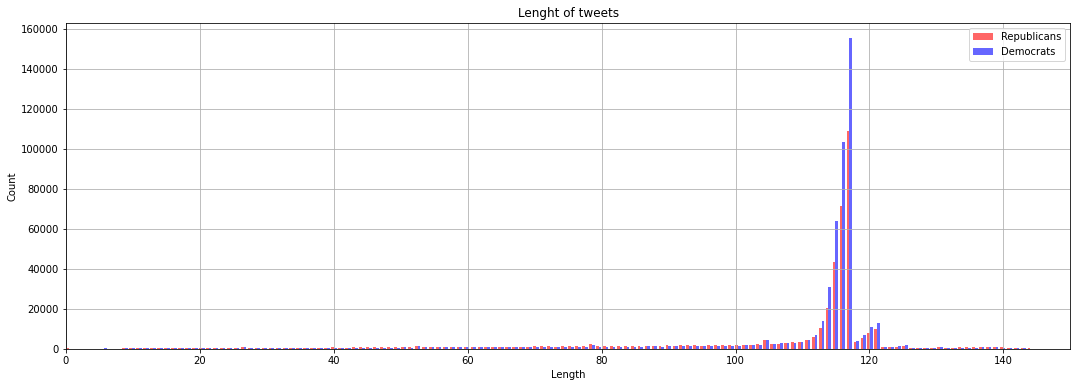

In [19]:
plt.rcParams['figure.figsize'] = (18, 6)
bins = 150
plt.title('Lenght of tweets')
plt.hist([df_republicans['length'], df_democrats['length']], alpha = 0.6, bins=bins, 
         label=['Republicans', 'Democrats'], color = ['r','b'])
plt.xlabel('Length');
plt.ylabel('Count');
plt.legend(loc='upper right');
plt.xlim(0,150);
plt.grid();
plt.show();

#### Characters in tweets

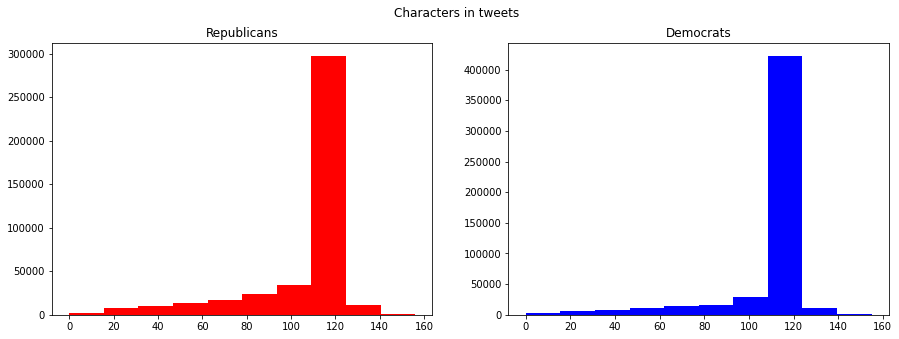

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len_r=df_republicans['text'].str.len()
ax1.hist(tweet_len_r, color='r')
ax1.set_title('Republicans')
tweet_len_d=df_democrats['text'].str.len()
ax2.hist(tweet_len_d, color='b')
ax2.set_title('Democrats')
fig.suptitle('Characters in tweets')
plt.show()

#### Temporal distribution of tweets by month

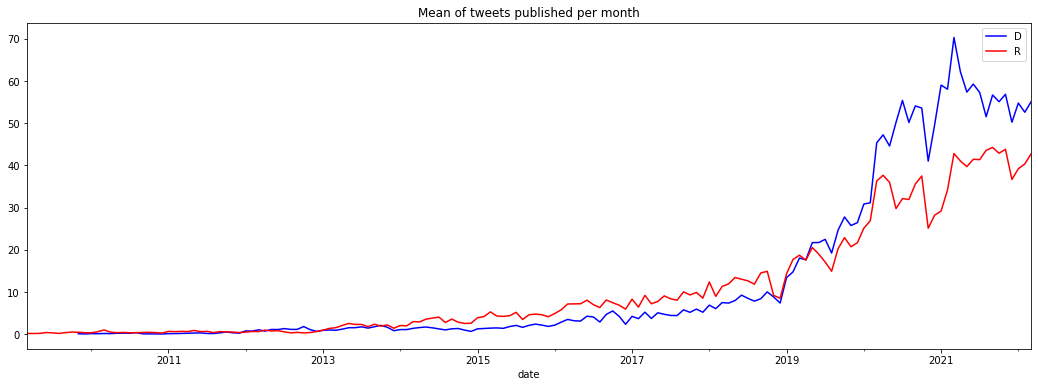

In [21]:
fig, ax = plt.subplots(figsize=(18, 6))

for label in df.label.unique():
    df_temp = df[df['label'] == label].copy()
    df_temp['date'] = pd.to_datetime(df_temp['created_at'].dt.strftime('%m/%Y'))
    number_users = df_temp.username.nunique()
    df_temp = df_temp.groupby(df_temp['date']).size()
    #Standarize by number of users
    df_temp = df_temp.divide(other = number_users)
    color = 'r' if label == 'R' else 'b'
    df_temp.plot(label=label, ax=ax, color=color)

ax.set_title('Mean of tweets published per month')
ax.legend();

#### Number of words in tweets

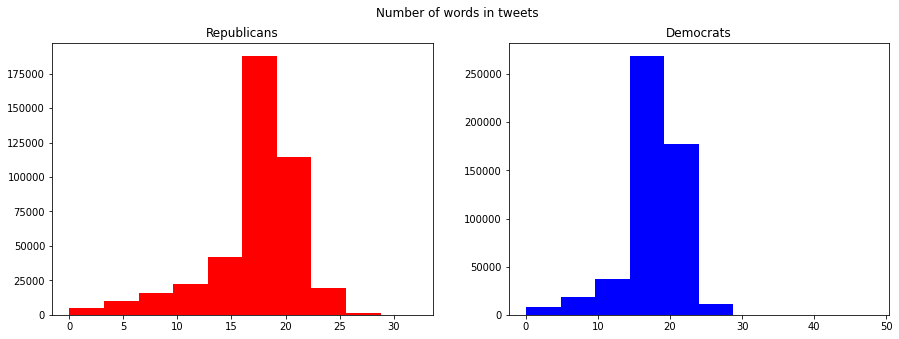

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len_r=df_republicans['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len_r, color='r')
ax1.set_title('Republicans')
tweet_len_d=df_democrats['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len_d, color='b')
ax2.set_title('Democrats')
fig.suptitle('Number of words in tweets')
plt.show()

#### Average word lenght in tweets

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py

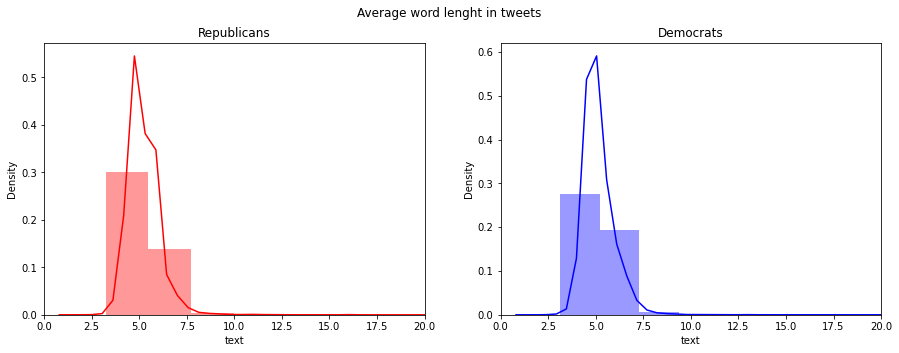

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=df_republicans['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='r')
ax1.set_title('Republicans')
ax1.set(xlim=(0, 20))
word=df_democrats['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='b')
ax2.set_title('Democrats')
ax2.set(xlim=(0, 20))
fig.suptitle('Average word lenght in tweets');

In [24]:
from nltk.tokenize import TweetTokenizer

def create_corpus(label):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    corpus = []
    for x in df[df['label']==label]['text']:
        corpus += tokenizer.tokenize(x)
    return corpus

In [25]:
create_corpus(label='R')[:20]

['i',
 'have',
 'joined',
 'my',
 'fellow',
 'co-chairs',
 'of',
 'the',
 'congressional',
 'coalition',
 'on',
 'adoption',
 'in',
 'penning',
 'a',
 'letter',
 'to',
 'u',
 '.',
 's']

#### Punctuation and strange characters in tweets

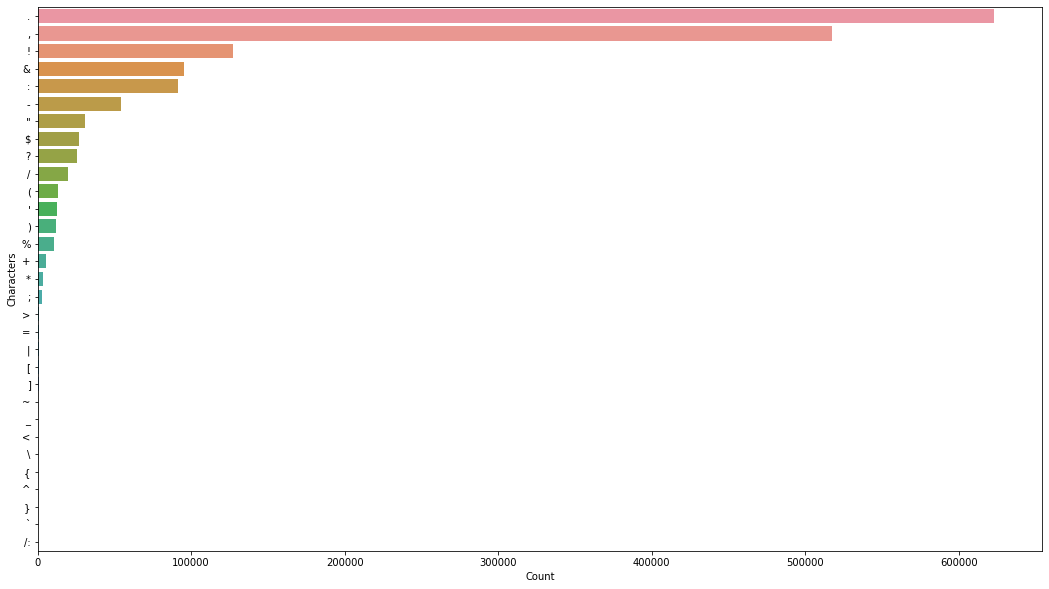

In [26]:
import string

plt.figure(figsize=(18,10))
list_of_words = create_corpus(label='R') + create_corpus(label='D')

punctuation = string.punctuation
special_characters = []

for word in list_of_words:
    if word in punctuation:
        special_characters.append(word)
        
special_characters_df = pd.DataFrame(special_characters, columns=['Characters'])
special_characters_df = special_characters_df.groupby('Characters').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

sns.barplot(x=special_characters_df['Count'], y=special_characters_df['Characters']);

#### Most common words in tweets

In [27]:
from collections import Counter

list_of_words_republicans = create_corpus(label='R')
list_of_words_democrats = create_corpus(label='D')
top_used_words_republicans = dict(Counter(list_of_words_republicans))
top_used_words_democrats = dict(Counter(list_of_words_democrats))
top_used_words_ordered_republicans = sorted(top_used_words_republicans.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered_democrats = sorted(top_used_words_democrats.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered_republicans[:5]

[('the', 359454), ('to', 285738), ('.', 284941), ('…', 278426), (',', 206605)]

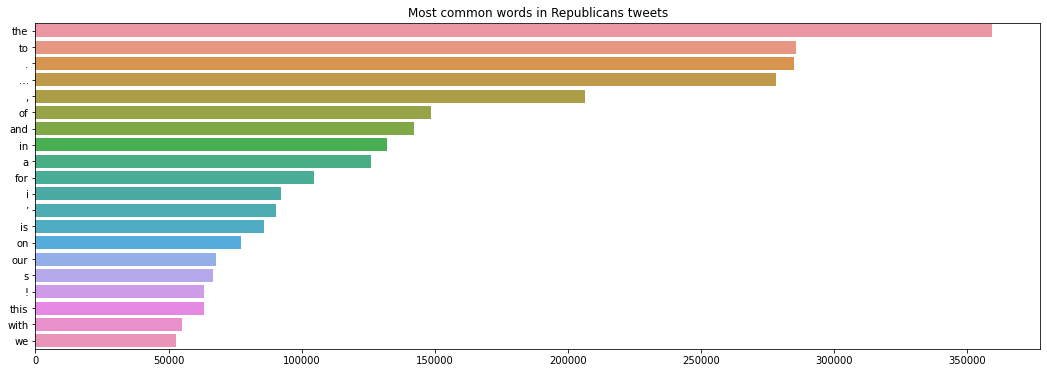

In [28]:
words = [i[0] for i in top_used_words_ordered_republicans[:20]]
count = [i[1] for i in top_used_words_ordered_republicans[:20]]
sns.barplot(x=count,y=words).set_title('Most common words in Republicans tweets');

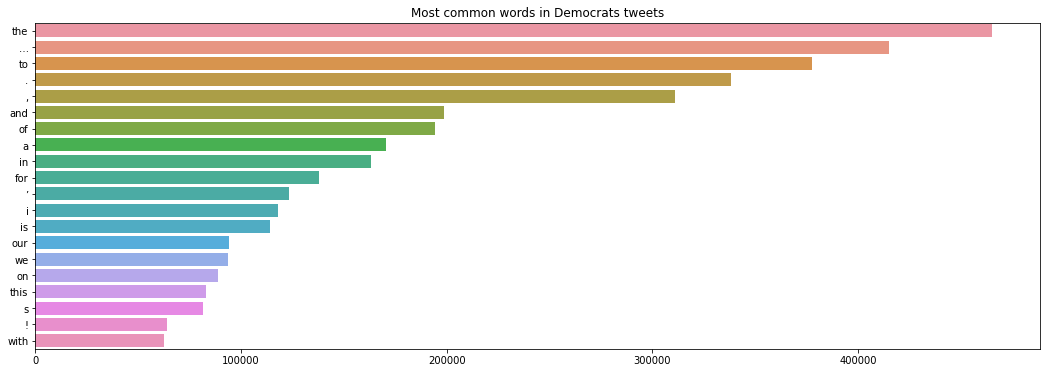

In [29]:
words = [i[0] for i in top_used_words_ordered_democrats[:20]]
count = [i[1] for i in top_used_words_ordered_democrats[:20]]
sns.barplot(x=count,y=words).set_title('Most common words in Democrats tweets');

# work in progress ---------------------------------------------------------------------


In [30]:
tweets_clean = []
for word in tokenizer.tokenize(df['text'][1]): # Go through every word in your tokens list
    if (word not in stop and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)
print(tweets_clean)

NameError: ignored

In [ ]:
#nomalizacion

text = " ".join(tweets_clean)
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
stemmer = nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tokens)

In [ ]:
import nltk
nltk.download('wordnet')

stemmer = nltk.stem.WordNetLemmatizer()
" ".join(stemmer.lemmatize(token,"v") for token in tokens)

In [ ]:
from nltk.stem import PorterStemmer        # module for stemming


# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

# ---------------------------------------------------------------------------------------------------------

#### Most common words in tweets which are not stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


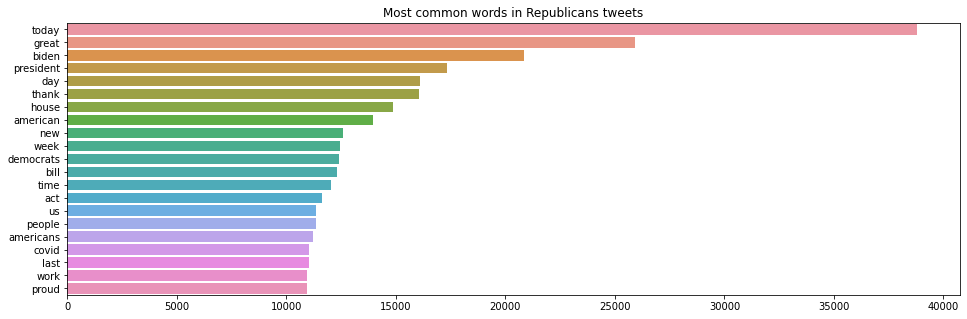

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
import string


words = []
count = []
list_of_rubish = ['&amp;', '-', '…', '’', '“', '—', '”', '✔', 'amp']
for word, number in top_used_words_ordered_republicans:
    if len(words) > 20:
        break
    elif (word not in stop) and (word not in list_of_rubish) and (word not in string.punctuation):
        words.append(word)
        count.append(number)
plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words).set_title('Most common words in Republicans tweets');

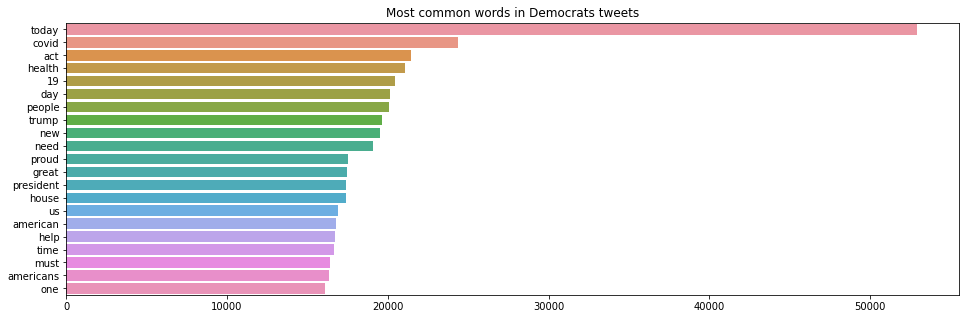

In [32]:
words = []
count = []
for word, number in top_used_words_ordered_democrats:
    if len(words) > 20:
        break
    elif (word not in stop) and (word not in list_of_rubish) and (word not in string.punctuation):
        words.append(word)
        count.append(number)
plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words).set_title('Most common words in Democrats tweets');

#### Most common pairs of words in tweets

In [33]:
def create_list_of_bigrams_new(label):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    list_of_bigrams=[]
    
    for x in df[df['label']==label]['text']:
        corpus = tokenizer.tokenize(x)
        corpus_cleaned = []
        for word in corpus:
            if (word not in stop) and (word not in list_of_rubish) and (word not in string.punctuation):
                corpus_cleaned.append(word)
        for i in range(len(corpus_cleaned)-1):
            list_of_bigrams.append(tuple(corpus_cleaned[i:i+2]))
    return list_of_bigrams

In [34]:
list_of_bigrams_republicans = create_list_of_bigrams_new(label='R')
list_of_bigrams_democrats = create_list_of_bigrams_new(label='D')

In [35]:
top_used_bigrams_republicans = dict(Counter(list_of_bigrams_republicans))
top_used_bigrams_democrats = dict(Counter(list_of_bigrams_democrats))
top_used_bigrams_ordered_republicans = sorted(top_used_bigrams_republicans.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered_democrats = sorted(top_used_bigrams_democrats.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered_republicans[:5]

[(('covid', '19'), 8017),
 (('president', 'biden'), 4811),
 (('joe', 'biden'), 3863),
 (('men', 'women'), 3565),
 (('small', 'businesses'), 3176)]

In [36]:
#transform the bigrams from tuple to string
for i in range(len(top_used_bigrams_ordered_republicans)):
    top_used_bigrams_ordered_republicans[i] = (" ".join(top_used_bigrams_ordered_republicans[i][0]), top_used_bigrams_ordered_republicans[i][1])
for i in range(len(top_used_bigrams_ordered_democrats)):
    top_used_bigrams_ordered_democrats[i] = (" ".join(top_used_bigrams_ordered_democrats[i][0]), top_used_bigrams_ordered_democrats[i][1])

In [37]:
top_used_bigrams_ordered_republicans[:20]

[('covid 19', 8017),
 ('president biden', 4811),
 ('joe biden', 3863),
 ('men women', 3565),
 ('small businesses', 3176),
 ('biden administration', 3049),
 ('last night', 2930),
 ('last week', 2779),
 ('united states', 2631),
 ('american people', 2557),
 ('🇺 🇸', 2502),
 ('president trump', 2480),
 ('great news', 2444),
 ('health care', 2381),
 ('law enforcement', 2316),
 ('years ago', 2269),
 ('southern border', 2268),
 ('happy birthday', 2163),
 ('looking forward', 2151),
 ('high school', 2124)]

Text(0.5, 1.0, 'Most common pairs of words in Republicans tweets')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


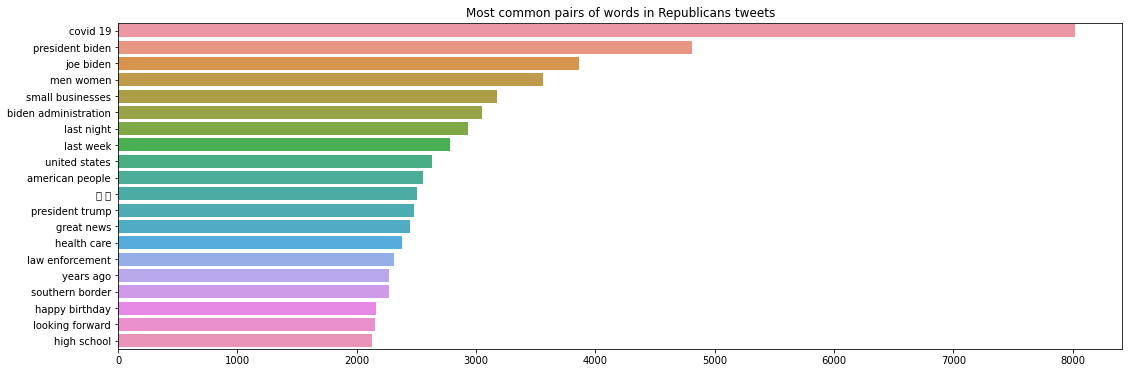

In [38]:
x,y=map(list,zip(*top_used_bigrams_ordered_republicans[:20]))
sns.barplot(x=y,y=x).set_title('Most common pairs of words in Republicans tweets')

Text(0.5, 1.0, 'Most common pairs of words in Democrats tweets')

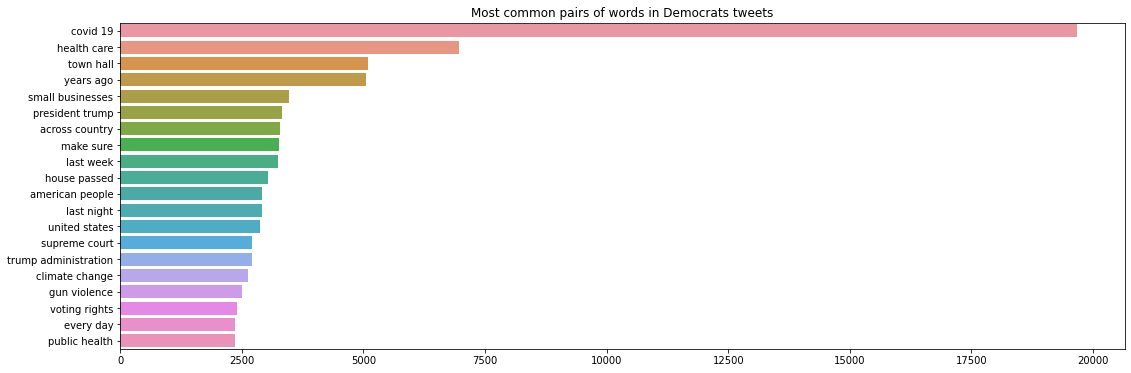

In [39]:
x,y=map(list,zip(*top_used_bigrams_ordered_democrats[:20]))
sns.barplot(x=y,y=x).set_title('Most common pairs of words in Democrats tweets')

#### I suspect that there are gonna be URLs

In [40]:
for element in df.query('text.str.contains("http")', engine='python')['text']:
  print(element)

Iraqi Minister of Defense asks why US revealed allies' military plans excellentquestion  aidingtheenemy http:/tinyurl.com/ocov9c6
House &amp; Senate Approve Coronavirus Relief:  Legislation Includes Posey’s Provision to Protect NASA &amp; Defense Contractor Jobs and Pay http...
It is a badge of honor to be attacked by latimes for fighting for coastal restoration dollars. http ://lat.ms/Q376wO
READ: The Imperial Presidency http:


# DOWNLOAD DF

In [ ]:
!ls

In [ ]:
import pyarrow as pa
import pyarrow.orc as orc
from google.colab import files

table = pa.Table.from_pandas(df, preserve_index=False)
orc.write_table(table, 'working_df.orc')
files.download('working_df.orc')